In [206]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [207]:
def propagazione_cursori(Vdiv, measure):

    sigma = np.sqrt( (0.04 * Vdiv)**2 + (0.015 * measure)**2)

    return sigma

In [208]:
def lin(x, a, b):  
    return a + b * x

def esp(x, a, b, c):  
    return a + b * np.exp(- x * c**-1)

In [209]:
# OSC DATA
file_in =  '../../Data/PreAmp/calib_in_18.txt'
file_vdiv =  '../../Data/PreAmp/calib_in_vdiv_18.txt'

# ARDUINO DATA
file1 = '../../Data/PreAmp/calib_02_18_ROOT.dat'
file2 = '../../Data/PreAmp/calib_05_18_ROOT.dat'
file3 = '../../Data/PreAmp/calib_08_18_ROOT.dat'
file4 = '../../Data/PreAmp/calib_10_18_ROOT.dat'
file5 = '../../Data/PreAmp/calib_12_18_ROOT.dat'
file6 = '../../Data/PreAmp/calib_15_18_ROOT.dat'
file7 = '../../Data/PreAmp/calib_18_18_ROOT.dat'
file8 = '../../Data/PreAmp/calib_20_18_ROOT.dat'
file9 = '../../Data/PreAmp/calib_21_18_ROOT.dat'
file10 = '../../Data/PreAmp/calib_22_18_ROOT.dat'
file11 = '../../Data/PreAmp/calib_23_18_ROOT.dat'
file12 = '../../Data/PreAmp/calib_24_18_ROOT.dat'
file13 = '../../Data/PreAmp/calib_25_18_ROOT.dat'

# READ ARDUINO DATA
data1 = pd.read_csv(file1, sep = ' ', index_col = False, header = None)
data1.index = np.arange(1, len(data1)+1)
data1.columns = ['time', 'ADC']
data2 = pd.read_csv(file2, sep = ' ', index_col = False, header = None)
data2.index = np.arange(1, len(data2)+1)
data2.columns = ['time', 'ADC']
data3 = pd.read_csv(file3, sep = ' ', index_col = False, header = None)
data3.index = np.arange(1, len(data3)+1)
data3.columns = ['time', 'ADC']
data4 = pd.read_csv(file4, sep = ' ', index_col = False, header = None)
data4.index = np.arange(1, len(data4)+1)
data4.columns = ['time', 'ADC']
data5 = pd.read_csv(file5, sep = ' ', index_col = False, header = None)
data5.index = np.arange(1, len(data5)+1)
data5.columns = ['time', 'ADC']
data6 = pd.read_csv(file6, sep = ' ', index_col = False, header = None)
data6.index = np.arange(1, len(data6)+1)
data6.columns = ['time', 'ADC']
data7 = pd.read_csv(file7, sep = ' ', index_col = False, header = None)
data7.index = np.arange(1, len(data7)+1)
data7.columns = ['time', 'ADC']
data8 = pd.read_csv(file8, sep = ' ', index_col = False, header = None)
data8.index = np.arange(1, len(data8)+1)
data8.columns = ['time', 'ADC']
data9 = pd.read_csv(file9, sep = ' ', index_col = False, header = None)
data9.index = np.arange(1, len(data9)+1)
data9.columns = ['time', 'ADC']
data10 = pd.read_csv(file10, sep = ' ', index_col = False, header = None)
data10.index = np.arange(1, len(data10)+1)
data10.columns = ['time', 'ADC']
data11 = pd.read_csv(file11, sep = ' ', index_col = False, header = None)
data11.index = np.arange(1, len(data11)+1)
data11.columns = ['time', 'ADC']
data12 = pd.read_csv(file12, sep = ' ', index_col = False, header = None)
data12.index = np.arange(1, len(data12)+1)
data12.columns = ['time', 'ADC']
data13 = pd.read_csv(file13, sep = ' ', index_col = False, header = None)
data13.index = np.arange(1, len(data13)+1)
data13.columns = ['time', 'ADC']

# GET MAX VALUES
max1 = data1['ADC'].max()
max2 = data2['ADC'].max()
max3 = data3['ADC'].max()
max4 = data4['ADC'].max()
max5 = data5['ADC'].max()
max6 = data6['ADC'].max()
max7 = data7['ADC'].max()
max8 = data8['ADC'].max()
max9 = data9['ADC'].max()
max10 = data10['ADC'].max()
max11 = data11['ADC'].max()
max12 = data12['ADC'].max()
max13 = data13['ADC'].max()
max_values = np.array([max1, max2, max3, max4, max5, max6, max7, max8, max9, max10, max11, max12, max13])

# READ OSC DATA
Vin = np.loadtxt(file_in)
Vdiv = np.loadtxt(file_vdiv)

# MAKE DATAFRAME
data = pd.DataFrame({'max_values': list(max_values), 'Vin': list(Vin), 'Vdiv': list(Vdiv)}, columns = ['max_values', 'Vin', 'Vdiv'])

# ERROR PROPAGATION ON OSC DATA
data['err Vin'] = propagazione_cursori(data['Vdiv'], data['Vin'])

# SELECT RELEVANT DATAPOINTS
data = data.iloc[:4,:]

# SHOW DATA
data

,max_values,Vin,Vdiv,err Vin
0,1019,0.206,0.05,0.003681
1,1383,0.512,0.10,0.008659
2,1765,0.824,0.20,0.014723
3,2019,1.020,0.20,0.017265


In [210]:
# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = data['max_values'], ydata = data['Vin'], sigma = data['err Vin'], absolute_sigma = True)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a_calib = fit_par[0]
b_calib = fit_par[1]
err_a_calib = fit_err[0]
err_b_calib = fit_err[1]

# PRINT CALIBRATION FUNCTION
print(
        'VOLT = ' +  ' (' + format(a_calib, '.3f') + ' +/- ' + format(err_a_calib, '.3f') + ') ' + ' + ' 
        + ' (' + format(b_calib, '.6f') + ' +/- ' + format(err_b_calib, '.6f') + ') ' + ' ADC'
    )

VOLT =  (-0.633 +/- 0.015)  +  (0.000824 +/- 0.000013)  ADC


In [211]:
# ARDUINO WAVEFORM DATA
file_name = '../../Data/PreAmp/data_arduino.dat'

# READ DATA
data = pd.read_csv(file_name, index_col = False, header = None, sep = ' ')
data.index = np.arange(1, len(data)+1)

data.columns = ['time', 'ADC']

# CALIBRATION
# on time
data['time (ms)'] = data['time'] * 1e3 * 955000**-1
# on tension
data['V (V)'] = a_calib + b_calib * data['ADC']

# TOTAL ERROR PROPAGATION
data['err V (V)'] = np.sqrt( ( err_a_calib )**2 + ( err_b_calib  * data['ADC'] )**2)

# ERROR PROPAGATION SENZA CONTRIBUTO DI SCALA
data['err Vr (V)'] = err_a_calib

# SHOW DATA
data

,time,ADC,time (ms),V (V),err V (V),err Vr (V)
1,1,795,0.001047,0.022105,0.017875,0.014785
2,2,793,0.002094,0.020457,0.017861,0.014785
3,3,793,0.003141,0.020457,0.017861,0.014785
4,4,798,0.004188,0.024577,0.017897,0.014785
5,5,795,0.005236,0.022105,0.017875,0.014785
...,...,...,...,...,...,...
2043,2043,793,2.139267,0.020457,0.017861,0.014785
2044,2044,776,2.140314,0.006450,0.017741,0.014785
2045,2045,787,2.141361,0.015514,0.017819,0.014785
2046,2046,788,2.142408,0.016337,0.017826,0.014785


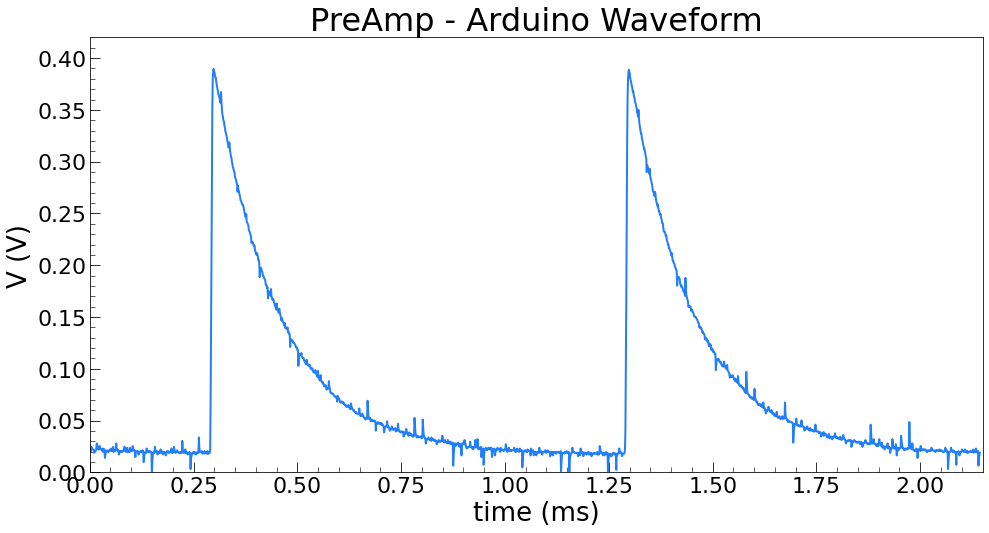

In [212]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data['time (ms)'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 2.15)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [213]:
# SPLIT DATA INTO TWO DATAFRAMES
data1 = data.iloc[284:1231,:]
data2 = data.iloc[1239:,:]

In [214]:
# TRASLAZIONE A ZERO
data1['time'] = data1['time'] - 284
data2['time'] = data2['time'] - 1239

In [215]:
data1.reset_index(inplace = True)
data1.drop(labels = 'index', axis = 1, inplace=True)
data2.reset_index(inplace = True)
data2.drop(labels = 'index', axis = 1, inplace=True)

In [216]:
data1['time (ms)'] = data1['time'] * 1e3 * 955000**-1
data2['time (ms)'] = data2['time'] * 1e3 * 955000**-1

In [217]:
data1 = data1[data1['time (ms)'] < 0.8]
data2 = data2[data2['time (ms)'] < 0.8]

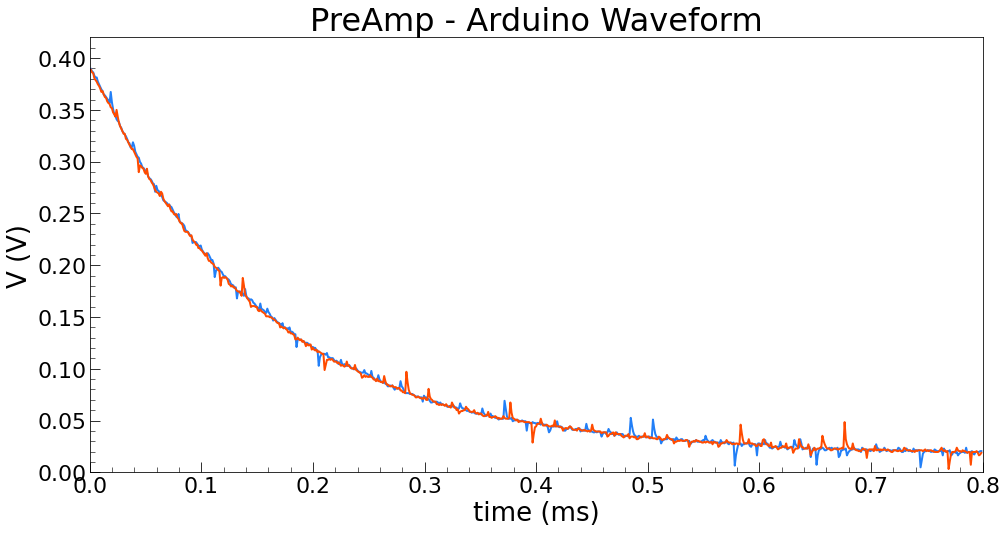

In [218]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data2['time (ms)'], data2['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')
# ax1.plot(data['time'], data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')

# PLOT TITLE
ax1.set_title('PreAmp - Arduino Waveform', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

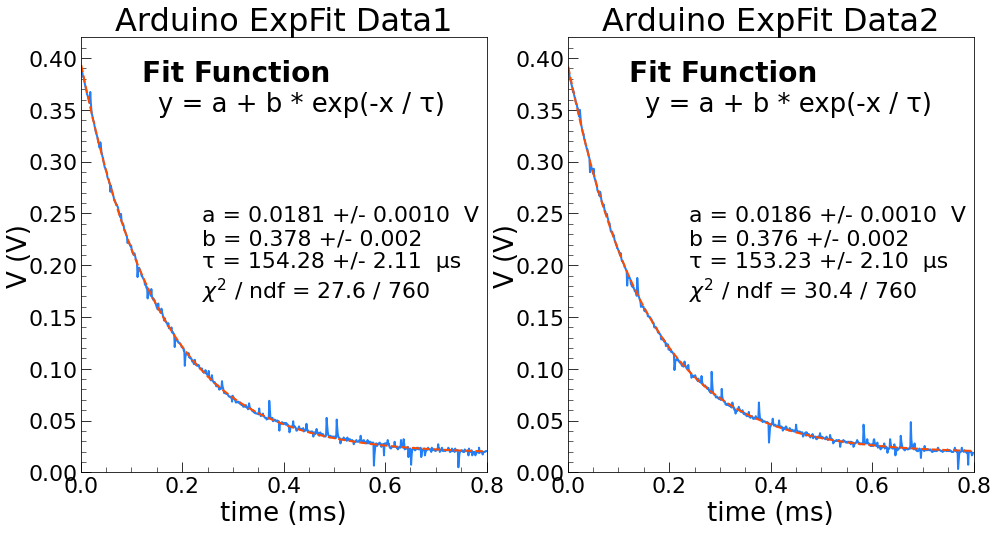

In [219]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# ----------------- DATA 1 
par, cov = curve_fit(f = esp, xdata = data1['time (ms)'], ydata = data1['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = data1['err Vr (V)'], absolute_sigma = True)

func = esp(data1['time (ms)'], *par)

# COMPUTE RESIDUALS
res = data1['V (V)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/data1['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]


# ----------------- DATA 2 
par2, cov2 = curve_fit(f = esp, xdata = data2['time (ms)'], ydata = data2['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = data2['err Vr (V)'], absolute_sigma = True)

func2 = esp(data2['time (ms)'], *par2)

# COMPUTE RESIDUALS
res2 = data2['V (V)'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/data2['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
tau2 = fit_par2[2]
a_err2 = fit_err2[0]
b_err2 = fit_err2[1]
tau_err2 = fit_err2[2]

# PLOT DATA
ax1.plot(data1['time (ms)'], data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(data1['time (ms)'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

ax2.plot(data2['time (ms)'], data2['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax2.plot(data2['time (ms)'], func2, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f')
cc = '\u03C4 = ' + format(tau * 1e3, '1.2f') + ' +/- ' + format(tau_err * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(data1['time (ms)'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.30, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.4f') + ' +/- ' + format(a_err2, '1.4f') + '  V'
bb2 = 'b = ' + format(b2, '1.3f') + ' +/- ' + format(b_err2, '1.3f')
cc2 = '\u03C4 = ' + format(tau2 * 1e3, '1.2f') + ' +/- ' + format(tau_err2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(data2['time (ms)'] ) - len(par2), '1.0f') 


ax2.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.30, 0.4, aa2 + '\n' + bb2 + '\n' + cc2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit Data1', fontsize = 32)
ax2.set_title('Arduino ExpFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)
ax2.set_xlabel('time (ms)', fontsize = 26)
ax2.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)
ax2.set_xlim(left = 0, right = 0.8)
ax2.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [220]:
lin_data1 = data1.copy()
lin_data2 = data2.copy()

In [221]:
lin_data1['normV (V)'] = lin_data1['V (V)'] - a
lin_data1['err normVr (V)'] = np.sqrt(lin_data1['err Vr (V)']**2 + a_err**2)

lin_data1 = lin_data1[(lin_data1['normV (V)'] > 0)]

lin_data1['logV'] = np.log(lin_data1['normV (V)'])
lin_data1['err logV'] = lin_data1['err normVr (V)'] / lin_data1['normV (V)']

lin_data1 = lin_data1[(lin_data1['err logV'] < 1)]
lin_data1 = lin_data1[(lin_data1['time (ms)'] < 0.5)]

lin_data1

,time,ADC,time (ms),V (V),err V (V),err Vr (V),normV (V),err normVr (V),logV,err logV
0,1,1241,0.001047,0.389579,0.021553,0.014785,0.371478,0.01482,-0.990265,0.039894
1,2,1238,0.002094,0.387107,0.021526,0.014785,0.369007,0.01482,-0.996941,0.040161
2,3,1237,0.003141,0.386283,0.021516,0.014785,0.368183,0.01482,-0.999176,0.040251
3,4,1233,0.004188,0.382987,0.021480,0.014785,0.364887,0.01482,-1.008168,0.040615
4,5,1231,0.005236,0.381339,0.021461,0.014785,0.363239,0.01482,-1.012694,0.040799
...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.034464,0.017982,0.014785,0.016364,0.01482,-4.112694,0.905650
473,474,810,0.496335,0.034464,0.017982,0.014785,0.016364,0.01482,-4.112694,0.905650
474,475,810,0.497382,0.034464,0.017982,0.014785,0.016364,0.01482,-4.112694,0.905650
475,476,810,0.498429,0.034464,0.017982,0.014785,0.016364,0.01482,-4.112694,0.905650


In [222]:
lin_data2['normV (V)'] = lin_data2['V (V)'] - a2
lin_data2['err normVr (V)'] = np.sqrt(lin_data2['err Vr (V)']**2 + a_err2**2)

lin_data2 = lin_data2[(lin_data2['normV (V)'] > 0)]

lin_data2['logV'] = np.log(lin_data2['normV (V)'])
lin_data2['err logV'] = lin_data2['err normVr (V)'] / lin_data2['normV (V)']

lin_data2 = lin_data2[(lin_data2['err logV'] < 1)]
lin_data2 = lin_data2[(lin_data2['time (ms)'] < 0.5)]

lin_data2

,time,ADC,time (ms),V (V),err V (V),err Vr (V),normV (V),err normVr (V),logV,err logV
0,1,1240,0.001047,0.388755,0.021544,0.014785,0.370118,0.014819,-0.993932,0.040039
1,2,1237,0.002094,0.386283,0.021516,0.014785,0.367647,0.014819,-1.000633,0.040309
2,3,1236,0.003141,0.385459,0.021507,0.014785,0.366823,0.014819,-1.002877,0.040399
3,4,1230,0.004188,0.380515,0.021452,0.014785,0.361879,0.014819,-1.016445,0.040951
4,5,1228,0.005236,0.378868,0.021434,0.014785,0.360231,0.014819,-1.021009,0.041138
...,...,...,...,...,...,...,...,...,...,...
472,473,810,0.495288,0.034464,0.017982,0.014785,0.015828,0.014819,-4.145998,0.936292
473,474,810,0.496335,0.034464,0.017982,0.014785,0.015828,0.014819,-4.145998,0.936292
474,475,814,0.497382,0.037760,0.018011,0.014785,0.019123,0.014819,-3.956844,0.774931
475,476,809,0.498429,0.033640,0.017975,0.014785,0.015004,0.014819,-4.199458,0.987708


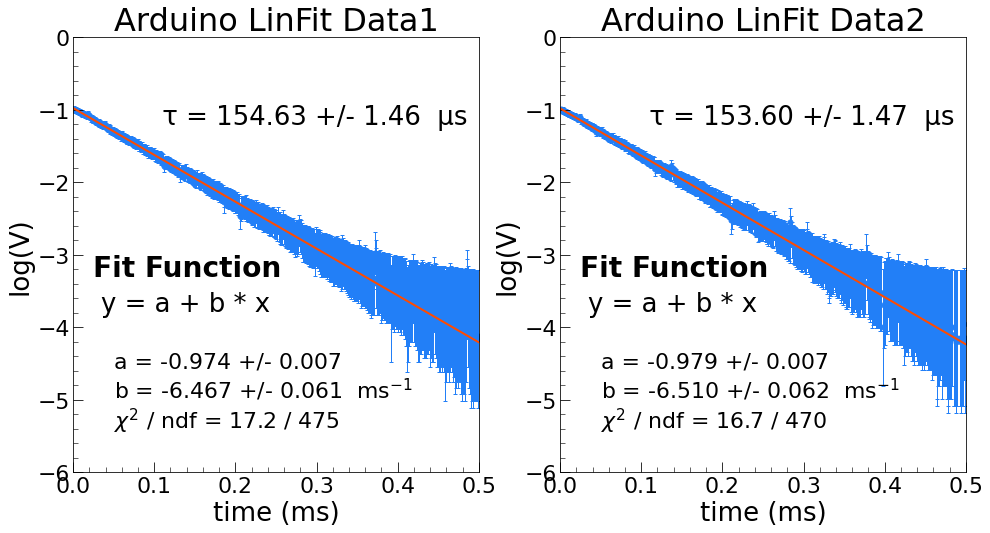

In [223]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data1['time (ms)'], ydata = lin_data1['logV'], sigma = lin_data1['err logV'], absolute_sigma=True)

func = lin(lin_data1['time (ms)'], *par)

# COMPUTE RESIDUALS
res = lin_data1['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data1['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]


# PERFORM THE FIT
par2, cov2 = curve_fit(f = lin, xdata = lin_data2['time (ms)'], ydata = lin_data2['logV'], sigma = lin_data2['err logV'], absolute_sigma=True)

func2 = lin(lin_data2['time (ms)'], *par2)

# COMPUTE RESIDUALS
res2 = lin_data2['logV'] - func2

# COMPUTE CHI2
chi22 = np.sum((res2/lin_data2['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error2 = []
for i in range(len(par2)):
    try:
        error2.append(np.absolute(cov2[i][i])**0.5)
    except:
        error2.append( 0.00 )

fit_par2 = par2
fit_err2 = np.array(error2)

a2 = fit_par2[0]
b2 = fit_par2[1]
err_a2 = fit_err2[0]
err_b2 = fit_err2[1]

# PLOT DATA
ax1.errorbar(lin_data1['time (ms)'], lin_data1['logV'], xerr = 0, yerr = lin_data1['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)
ax2.errorbar(lin_data2['time (ms)'], lin_data2['logV'], xerr = 0, yerr = lin_data2['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data1', zorder = 1)

ax1.plot(lin_data1['time (ms)'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)
ax2.plot(lin_data2['time (ms)'], func2, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2)

# ax1.plot(lin_data1['time (ms)'], lin_data1['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.3f') + ' +/- ' + format(err_a, '1.3f')
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(err_b, '1.3f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data1['time (ms)'] ) - len(par), '1.0f') 
ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.2, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

aa2 = 'a = ' + format(a2, '1.3f') + ' +/- ' + format(err_a2, '1.3f')
bb2 = 'b = ' + format(b2, '1.3f') + ' +/- ' + format(err_b2, '1.3f') + '  ms$^{-1}$'
tau2 = ' \u03C4 = ' + format(-b2**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b2 * b2**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq2 = '$\chi^{2}$ / ndf = ' + format(chi22, '1.1f') + ' / ' + format(len(lin_data2['time (ms)'] ) - len(par2), '1.0f') 
ax2.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax2.transAxes)
ax2.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax2.transAxes)
ax2.text(0.1, 0.1, aa2 + '\n' + bb2 + '\n' + chisq2, fontsize = 22, color = '#000000', transform = ax2.transAxes)
ax2.text(0.2, 0.8, tau2, fontsize = 26, color = '#000000', transform = ax2.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit Data1', fontsize = 32)
ax2.set_title('Arduino LinFit Data2', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('log(V)', fontsize = 26)
ax2.set_xlabel('time (ms)', fontsize = 26)
ax2.set_ylabel('log(V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()
ax2.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax2.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax2.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax2.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax2.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.5)
ax1.set_ylim(bottom = -6, top = 0)
ax2.set_xlim(left = 0, right = 0.5)
ax2.set_ylim(bottom = -6, top = 0)

plt.show()

In [224]:
V1 = data1['V (V)']
V2 = data2['V (V)']
V_12 = pd.concat((V1, V2))
V_12

V = V_12.groupby(V_12.index)
V_mean = V.mean()

err_V_mean = data1['err Vr (V)'] * 2**-0.5

final_data = pd.concat([data1['time'], data1['time (ms)'], V_mean, err_V_mean], axis=1)
final_data = final_data[(final_data['time (ms)'] < 0.8)]
final_data

,time,time (ms),V (V),err Vr (V)
0,1,0.001047,0.389167,0.010455
1,2,0.002094,0.386695,0.010455
2,3,0.003141,0.385871,0.010455
3,4,0.004188,0.381751,0.010455
4,5,0.005236,0.380103,0.010455
...,...,...,...,...
758,759,0.794764,0.020045,0.010455
759,760,0.795812,0.019221,0.010455
760,761,0.796859,0.017985,0.010455
761,762,0.797906,0.018809,0.010455


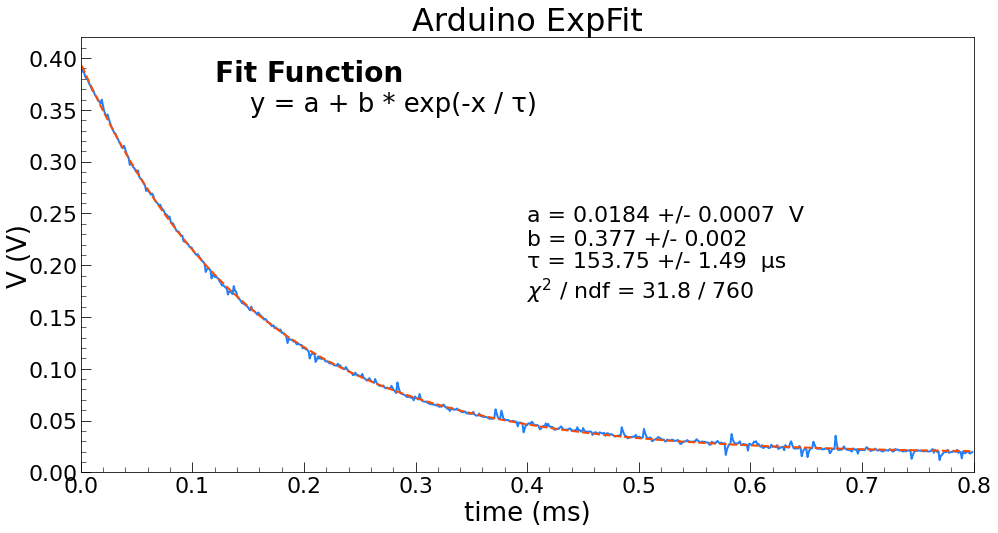

In [225]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# FILTERED FIT
par, cov = curve_fit(f = esp, xdata = final_data['time (ms)'], ydata = final_data['V (V)'], maxfev=1000, 
                    p0 = [0.02, 0.6, 0.151], sigma = final_data['err Vr (V)'], absolute_sigma = True)

func = esp(final_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = final_data['V (V)'] - func

# COMPUTE CHI2
chi2 = np.sum((res/final_data['err Vr (V)'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
tau = fit_par[2]
a_err = fit_err[0]
b_err = fit_err[1]
tau_err = fit_err[2]

# PLOT DATA
ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
ax1.plot(final_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, linestyle = 'dashed', label = 'Fit')

aa = 'a = ' + format(a, '1.4f') + ' +/- ' + format(a_err, '1.4f') + '  V'
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(b_err, '1.3f')
cc = '\u03C4 = ' + format(tau * 1e3, '1.2f') + ' +/- ' + format(tau_err * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(final_data['time (ms)'] ) - len(par), '1.0f') 


ax1.text(0.15, 0.90, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.19, 0.83, 'y = a + b * exp(-x / \u03C4)', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.5, 0.4, aa + '\n' + bb + '\n' + cc + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino ExpFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('V (V)', fontsize = 26, labelpad = -5)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.8)
ax1.set_ylim(bottom = 0, top = 0.42)

plt.show()

In [226]:
lin_data = final_data.copy()

In [227]:
lin_data['normV (V)'] = lin_data['V (V)'] - a
lin_data['err normVr (V)'] = np.sqrt(lin_data['err Vr (V)']**2 + a_err**2)

lin_data = lin_data[(lin_data['normV (V)'] > 0)]

lin_data['logV'] = np.log(lin_data['normV (V)'])
lin_data['err logV'] = lin_data['err normVr (V)'] / lin_data['normV (V)']

lin_data = lin_data[(lin_data['err logV'] < 1)]
lin_data = lin_data[(lin_data['time (ms)'] < 0.5)]

lin_data

,time,time (ms),V (V),err Vr (V),normV (V),err normVr (V),logV,err logV
0,1,0.001047,0.389167,0.010455,0.370798,0.010479,-0.992099,0.028261
1,2,0.002094,0.386695,0.010455,0.368326,0.010479,-0.998787,0.028450
2,3,0.003141,0.385871,0.010455,0.367502,0.010479,-1.001027,0.028514
3,4,0.004188,0.381751,0.010455,0.363382,0.010479,-1.012300,0.028837
4,5,0.005236,0.380103,0.010455,0.361734,0.010479,-1.016845,0.028969
...,...,...,...,...,...,...,...,...
472,473,0.495288,0.034464,0.010455,0.016095,0.010479,-4.129250,0.651072
473,474,0.496335,0.034464,0.010455,0.016095,0.010479,-4.129250,0.651072
474,475,0.497382,0.036112,0.010455,0.017743,0.010479,-4.031775,0.590604
475,476,0.498429,0.034052,0.010455,0.015683,0.010479,-4.155180,0.668175


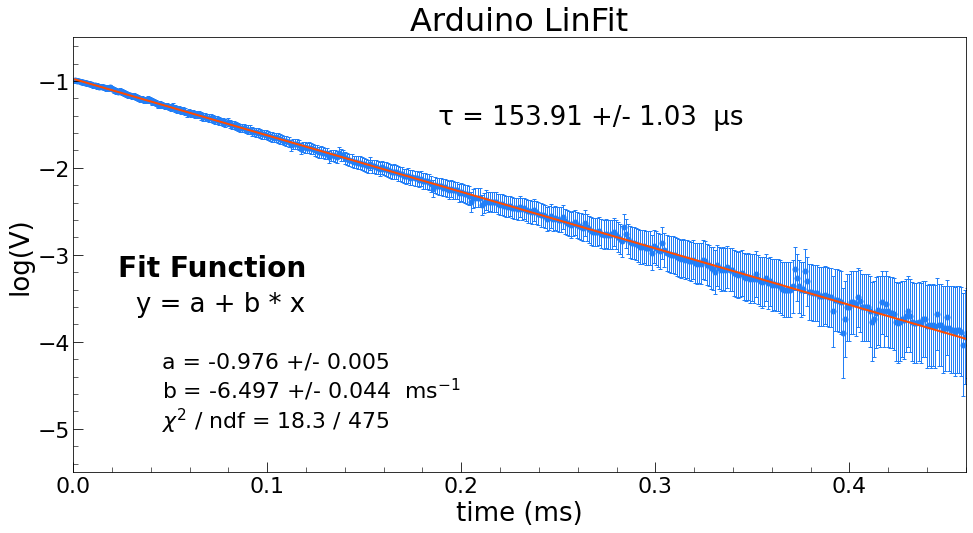

In [228]:
# FIG SETTINGS AND AXES
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

# PERFORM THE FIT
par, cov = curve_fit(f = lin, xdata = lin_data['time (ms)'], ydata = lin_data['logV'], sigma = lin_data['err logV'], absolute_sigma=True)

func = lin(lin_data['time (ms)'], *par)

# COMPUTE RESIDUALS
res = lin_data['logV'] - func

# COMPUTE CHI2
chi2 = np.sum((res/lin_data['err logV'])**2)

# GET FIT PARAMETERS AND PARAMETER ERRORS
error = []
for i in range(len(par)):
    try:
        error.append(np.absolute(cov[i][i])**0.5)
    except:
        error.append( 0.00 )

fit_par = par
fit_err = np.array(error)

a = fit_par[0]
b = fit_par[1]
err_a = fit_err[0]
err_b = fit_err[1]

# PLOT DATA
ax1.errorbar(lin_data['time (ms)'], lin_data['logV'], xerr = 0, yerr = lin_data['err logV'], elinewidth=1, capsize=2, color = '#227FF7', linewidth = 0, marker = '.', markersize = 10, label = 'lin_data', zorder = 1)

ax1.plot(lin_data['time (ms)'], func, color = '#FF4B00', linewidth = 2, label = 'Fit', zorder = 2, linestyle = 'solid')

# ax1.plot(lin_data['time (ms)'], lin_data['V (V)'], color = '#227FF7', linewidth = 2, label = 'Data')
# ax1.plot(final_data['time (ms)'], final_data['V (V)'], color = '#FF4B00', linewidth = 2, label = 'Data')

aa = 'a = ' + format(a, '1.3f') + ' +/- ' + format(err_a, '1.3f')
bb = 'b = ' + format(b, '1.3f') + ' +/- ' + format(err_b, '1.3f') + '  ms$^{-1}$'
tau = ' \u03C4 = ' + format(-b**-1 * 1e3, '1.2f') + ' +/- ' + format(err_b * b**-2 * 1e3, '1.2f') + '  \u03BCs'
chisq = '$\chi^{2}$ / ndf = ' + format(chi2, '1.1f') + ' / ' + format(len(lin_data['time (ms)'] ) - len(par), '1.0f') 
ax1.text(0.05, 0.45, 'Fit Function', fontsize = 28, fontweight = 'bold', transform=ax1.transAxes)
ax1.text(0.07, 0.37, 'y = a + b * x', fontsize = 26, color = '#000000', transform = ax1.transAxes)
ax1.text(0.1, 0.1, aa + '\n' + bb + '\n' + chisq, fontsize = 22, color = '#000000', transform = ax1.transAxes)
ax1.text(0.4, 0.8, tau, fontsize = 26, color = '#000000', transform = ax1.transAxes)

# PLOT TITLE
ax1.set_title('Arduino LinFit', fontsize = 32)

# AXIS LABELS
ax1.set_xlabel('time (ms)', fontsize = 26)
ax1.set_ylabel('log(V)', fontsize = 26)

# AXIS TICKS
ax1.tick_params(axis = 'both', which = 'major', labelsize = 22, direction = 'in', length = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 22, direction = 'in', length = 5)
ax1.set_xticks(ticks = ax1.get_xticks(), minor = True)
ax1.set_yticks(ticks = ax1.get_yticks(), minor = True)
ax1.minorticks_on()

# PLOT RANGE
ax1.set_xlim(left = 0, right = 0.46)
#ax1.set_ylim(bottom = -6, top = 0)

plt.show()